In [1]:
import ast 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick



# Set the path to the file you'd like to load
file_path = 'M:/3_datasets/covid_19_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

#clean
df.columns = df.columns.str.replace(' ', '_')
df['Last_Update'] = pd.to_datetime(df['Last_Update'], format='mixed') 
df['ObservationDate']= pd.to_datetime(df['ObservationDate'])

df.set_index('SNo', inplace=True)

df['Country/Region']= df['Country/Region'].fillna('else')
df['Province/State']= df['Province/State'].fillna('else')

df[['Confirmed','Deaths','Recovered']] = df[['Confirmed','Deaths','Recovered']].clip(lower=0) 



In [2]:
df['DailyNewCases'] = df.groupby('Country/Region')['Confirmed'].diff()


In [3]:
volatility = df.groupby('Country/Region')['DailyNewCases'].std().sort_values(ascending=False)

C:\Users\go\AppData\Local\Temp\ipykernel_4348\1554747262.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_volatility.values, y=top10_volatility.index, palette="mako")


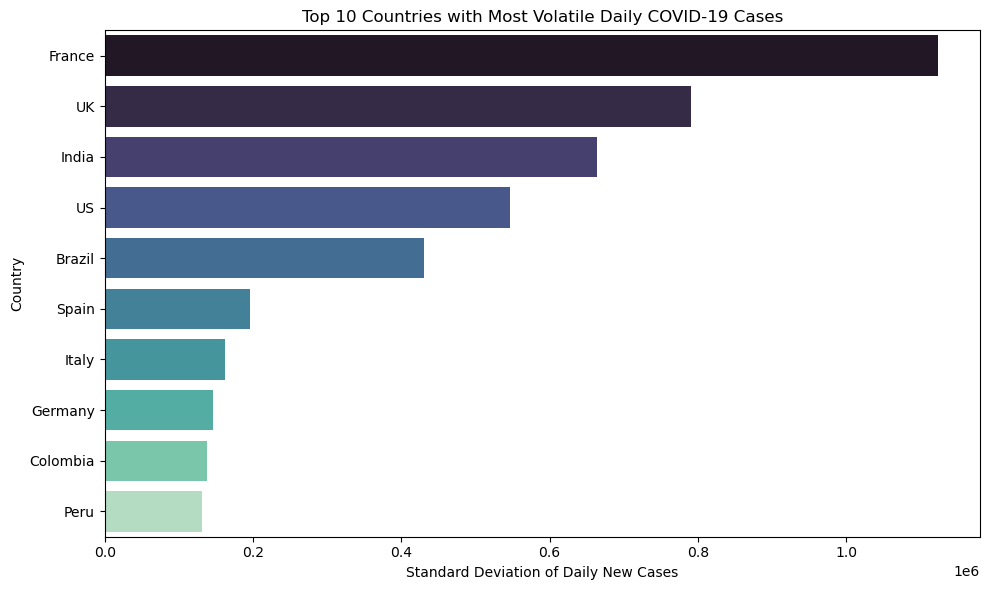

In [5]:
top10_volatility = volatility.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10_volatility.values, y=top10_volatility.index, palette="mako")
plt.xlabel("Standard Deviation of Daily New Cases")
plt.ylabel("Country")
plt.title("Top 10 Countries with Most Volatile Daily COVID-19 Cases")
plt.tight_layout()
plt.show()